The aim of this notebook is to decompose the PageRank algorithm and analyse the effect of new links, in an attempt
to understand how the ranking can be manipulated. We consider a PageRank game where we are given
the a small network and the task is to maximise the PageRank of vertex one.

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

### The Original Network
We create a small directed graph with 8 nodes

{1: 0.27194634185185407, 2: 0.09595137847853409, 3: 0.05952933585337699, 4: 0.06935196605123806, 5: 0.07769917114355235, 6: 0.0847942954720195, 7: 0.09082515115121657, 8: 0.24990235999820837}
Target has a pagerank of  0.27194634185185407


C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


Text(0.1, -1, '0.091')

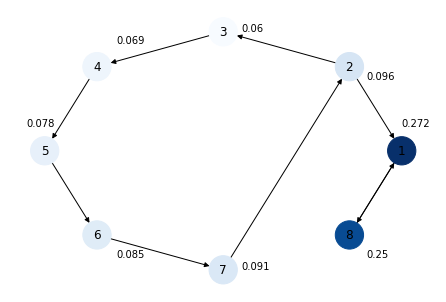

In [2]:
"""
The Original Graph
"""

# Declare this will be a directed graph
G = nx.DiGraph()

# Add 8 nodes
G.add_nodes_from(range(1,9))

# Add edges
G.add_edges_from([(2,3),(3,4),(4,5),(5,6),(6,7),(7,2),(2,1),(1,8),(8,1)])


# Calculate the PageRank of each Node
pr = nx.pagerank(G, alpha=0.85)
print(pr)
print("Target has a pagerank of ", pr[1])

# Convert dictionary to a list
PR = [k for k in pr.values()]
PR

# Draw network using shell layout
pos = nx.draw_shell(G, iterations=200,node_size=800, node_color=PR, with_labels=True,  cmap=plt.cm.Blues)

# Round the PageRank values to two decimal places
PR = [round(k,3) for k in pr.values()]
PR

# Plot the PageRank values beside their corresponding node
plt.text(1,0.2,s = str(PR[0])) # Node 1
plt.text(0.8,0.6,s = str(PR[1])) # Node 2
plt.text(0.1,1,s = str(PR[2])) # Node 3
plt.text(-0.6,0.9,s = str(PR[3])) # Node 4
plt.text(-1.1,0.2,s = str(PR[4])) # Node 5
plt.text(-0.6,-0.9,s = str(PR[5])) # Node 6
plt.text(0.8,-0.9,s = str(PR[7])) # Node 8
plt.text(0.1,-1,s = str(PR[6])) # Node 7
#plt.savefig("OriginalNetwork",dpi=500)

## Adding Edges To The Target Node
Here we allow two edges to be added to the network, each pointing to the target. We first present a naive solution, where the edges with the highest PageRank point to the target node. We then present an optimal solution based on the strategy presented in the paper by Martin Olsen and Anastasios Viglas; https://www.sciencedirect.com/science/article/pii/S0304397513005811

{1: 0.366832395514037, 2: 0.03936685124663814, 3: 0.03548091177982121, 4: 0.04890877501284848, 5: 0.06032245876092209, 6: 0.07002408994678555, 7: 0.04851023822738386, 8: 0.3305542795115637}
Target has a pagerank of  0.366832395514037


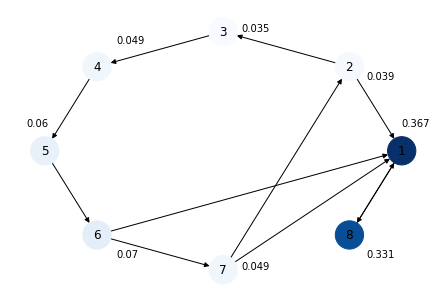

In [3]:
"""
The Original Graph: 
    Naive Solution: Add edges from pages with highest pagerank
    + edges (6,1), (7,1)
"""

# Declare this will be a directed graph
G = nx.DiGraph()

# Add 8 nodes
G.add_nodes_from(range(1,9))

# Add edges (same as the paper)
G.add_edges_from([(2,3),(3,4),(4,5),(5,6),(6,7),(7,2),(2,1),(1,8),(8,1)])

# Add edge from target to highest node
G.add_edges_from([(7,1),(6,1)])

# Calculate the PageRank of each Node
pr = nx.pagerank(G, alpha=0.85)
print(pr)
print("Target has a pagerank of ", pr[1])

# Convert dictionary to a list
PR = [k for k in pr.values()]
PR

pos = nx.draw_shell(G, iterations=200,node_size=800, node_color=PR, with_labels=True,  cmap=plt.cm.Blues)
PR = [round(k,3) for k in pr.values()]
PR

plt.text(1,0.2,s = str(PR[0])) # Node 1
plt.text(0.8,0.6,s = str(PR[1])) # Node 2
plt.text(0.1,1,s = str(PR[2])) # Node 3
plt.text(-0.6,0.9,s = str(PR[3])) # Node 4
plt.text(-1.1,0.2,s = str(PR[4])) # Node 5
plt.text(-0.6,-0.9,s = str(PR[5])) # Node 6
plt.text(0.8,-0.9,s = str(PR[7])) # Node 8
plt.text(0.1,-1,s = str(PR[6])) # Node 7
#plt.savefig("NaiveToTarget",dpi=500)

{1: 0.3745095307189688, 2: 0.054306250416494985, 3: 0.04183015642701037, 4: 0.054306250416494985, 5: 0.04183015642701037, 6: 0.054306250416494985, 7: 0.04183015642701037, 8: 0.337081248750515}
Target has a pagerank of  0.3745095307189688


Text(0.1, -1, '0.042')

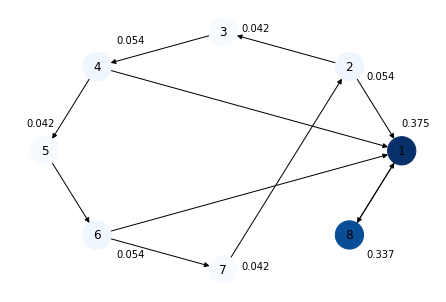

In [4]:
"""
The Original Graph: 
    Add two optimal new links based on Olsens stratrgy 
    + edges (6,1), (4,1)
"""

# Declare this will be a directed graph
G = nx.DiGraph()

# Add 8 nodes
G.add_nodes_from(range(1,9))

# Add edges (same as the paper)
G.add_edges_from([(2,3),(3,4),(4,5),(5,6),(6,7),(7,2),(2,1),(1,8),(8,1)])

# Add edge from target to highest node
G.add_edges_from([(4,1),(6,1)])

# Calculate the PageRank of each Node
pr = nx.pagerank(G, alpha=0.85)
print(pr)
print("Target has a pagerank of ", pr[1])

# Convert dictionary to a list
PR = [k for k in pr.values()]
PR

pos = nx.draw_shell(G, iterations=200,node_size=800, node_color=PR, with_labels=True,  cmap=plt.cm.Blues)

PR = [round(k,3) for k in pr.values()]
PR

plt.text(1,0.2,s = str(PR[0])) # Node 1
plt.text(0.8,0.6,s = str(PR[1])) # Node 2
plt.text(0.1,1,s = str(PR[2])) # Node 3
plt.text(-0.6,0.9,s = str(PR[3])) # Node 4
plt.text(-1.1,0.2,s = str(PR[4])) # Node 5
plt.text(-0.6,-0.9,s = str(PR[5])) # Node 6
plt.text(0.8,-0.9,s = str(PR[7])) # Node 8
plt.text(0.1,-1,s = str(PR[6])) # Node 7
#plt.savefig("OptimalToTarget",dpi=500)

## Adding Edges From The Target Node
Here we allow two edges to be added to the network, each pointing away from the target. We first present a naive solution, where the target node connects to edges from the optimal strategy presented earlier. We then present an optimal solution based on the strategy presented in the paper "The Effect of New Links on Google Pagerank" by Konstantin Avrachenkov and Nelly Litvak; https://www.tandfonline.com/doi/full/10.1080/15326340600649052?casa_token=RR_3lEilgg0AAAAA%3AMNnS21oXZtUdcay6CXhr2qTr0ZYq8JJaNnlVqr-I280IbEG0rPKJs1Yo2k0LPDxrCecP-QYzgL_5

{1: 0.13136504229628398, 2: 0.15303621330592065, 3: 0.08379078464041627, 4: 0.12719226879361067, 5: 0.12686203012998742, 6: 0.16380147831327763, 7: 0.1579821429333122, 8: 0.055970039587190955}
Target has a pagerank of  0.13136504229628398


Text(0.1, -1, '0.158')

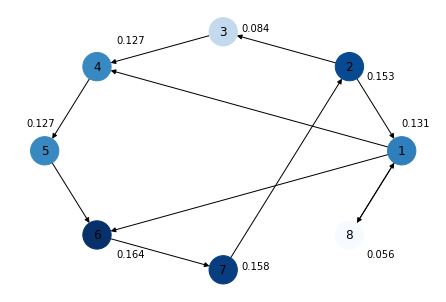

In [5]:
"""
The Original Graph: 
    Naive Solution: Add reversed edges from above solution 
    + edges (1,6), (1,7)
"""

# Declare this will be a directed graph
G = nx.DiGraph()

# Add 8 nodes
G.add_nodes_from(range(1,9))

# Add edges (same as the paper)
G.add_edges_from([(2,3),(3,4),(4,5),(5,6),(6,7),(7,2),(2,1),(1,8),(8,1)])

# Add edge from target to highest node
#G.add_edges_from([(1,7),(1,6)])
G.add_edges_from([(1,4),(1,6)])

# Calculate the PageRank of each Node
pr = nx.pagerank(G, alpha=0.85)
print(pr)
print("Target has a pagerank of ", pr[1])

# Convert dictionary to a list
PR = [k for k in pr.values()]
PR

pos = nx.draw_shell(G, iterations=200,node_size=800, node_color=PR, with_labels=True,  cmap=plt.cm.Blues)

PR = [round(k,3) for k in pr.values()]
PR

plt.text(1,0.2,s = str(PR[0])) # Node 1
plt.text(0.8,0.6,s = str(PR[1])) # Node 2
plt.text(0.1,1,s = str(PR[2])) # Node 3
plt.text(-0.6,0.9,s = str(PR[3])) # Node 4
plt.text(-1.1,0.2,s = str(PR[4])) # Node 5
plt.text(-0.6,-0.9,s = str(PR[5])) # Node 6
plt.text(0.8,-0.9,s = str(PR[7])) # Node 8
plt.text(0.1,-1,s = str(PR[6])) # Node 7
#plt.savefig("NaiveFromTarget2",dpi=500)

{1: 0.1557211088709492, 2: 0.19654271886133975, 3: 0.10228095159308342, 4: 0.10568912224878964, 5: 0.10858467511179362, 6: 0.11104808803665035, 7: 0.15726214876974431, 8: 0.06287118650764953}
Target has a pagerank of  0.1557211088709492


Text(0.1, -1, '0.157')

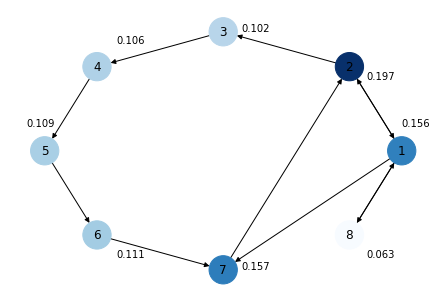

In [6]:
"""
The Original Graph: 
    Add two optimal new links from the target: based on Strategy from "The Effect of New Links on Google Pagerank"
    + edges (1,2), (1,7)
"""

# Declare this will be a directed graph
G = nx.DiGraph()

# Add 8 nodes
G.add_nodes_from(range(1,9))

# Add edges (same as the paper)
G.add_edges_from([(2,3),(3,4),(4,5),(5,6),(6,7),(7,2),(2,1),(1,8),(8,1)])

# Add new edges
G.add_edges_from([(1,2)])
G.add_edges_from([(1,7)])

# Calculate the PageRank of each Node
pr = nx.pagerank(G, alpha=0.85)
print(pr)
print("Target has a pagerank of ", pr[1])

# Convert dictionary to a list
PR = [k for k in pr.values()]
PR

pos = nx.draw_shell(G, iterations=200,node_size=800, node_color=PR, with_labels=True,  cmap=plt.cm.Blues)

PR = [round(k,3) for k in pr.values()]
PR

plt.text(1,0.2,s = str(PR[0])) # Node 1
plt.text(0.8,0.6,s = str(PR[1])) # Node 2
plt.text(0.1,1,s = str(PR[2])) # Node 3
plt.text(-0.6,0.9,s = str(PR[3])) # Node 4
plt.text(-1.1,0.2,s = str(PR[4])) # Node 5
plt.text(-0.6,-0.9,s = str(PR[5])) # Node 6
plt.text(0.8,-0.9,s = str(PR[7])) # Node 8
plt.text(0.1,-1,s = str(PR[6])) # Node 7

#plt.savefig("OptimalFromTarget",dpi=500)

## Link Farms
The most obvious strategy to increase the PageRank of node one is to create a large set of pages that link to the target
page, which is a techniques called "link farming".Here pages are created and links
are exchanged to boost the connectivity of the target page. We present three farm structures
1. All new nodes point to and from the target
2. All noew nodes point to the target, but the target does not point back
3. All new nodes point to and drom the target. Links from the original network also point to nodes in the farm

{1: 0.3440665635783047, 2: 0.05904619844896181, 3: 0.036633095879270314, 4: 0.04267659303584131, 5: 0.04781356587220762, 6: 0.052179992529838015, 7: 0.05589145518882385, 8: 0.060282089244458686, 9: 0.060282089244458686, 10: 0.060282089244458686, 11: 0.060282089244458686, 12: 0.060282089244458686, 13: 0.060282089244458686}
Target has a pagerank of  0.3440665635783047


Text(0.95, -0.6, '0.06')

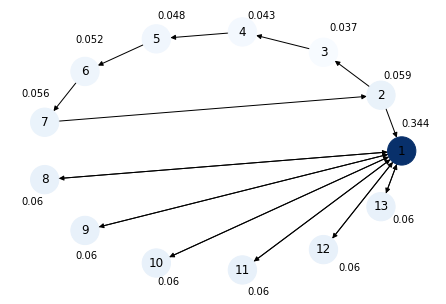

In [9]:
"""
The Original Graph: Add link Farm! No.1
 # 4 new nodes, all pointing to and from target
        
"""

# Declare this will be a directed graph
G = nx.DiGraph()

# Add 8 nodes
G.add_nodes_from(range(1,13))

# Add edges (same as the paper)
G.add_edges_from([(2,3),(3,4),(4,5),(5,6),(6,7),(7,2),(2,1),(1,8),(8,1)])

# Add edges to the target node
G.add_edges_from([(9,1),(10,1),(11,1),(12,1),(13,1)])

# Add edges from the target node
G.add_edges_from([(1,9),(1,10),(1,11),(1,12),(1,13)])

# Calculate the PageRank of each Node
pr = nx.pagerank(G, alpha=0.85)
print(pr)
print("Target has a pagerank of ", pr[1])

# Convert dictionary to a list
PR = [k for k in pr.values()]
PR

pos = nx.draw_shell(G, iterations=200,node_size=800, node_color=PR, with_labels=True,  cmap=plt.cm.Blues)

PR = [round(k,3) for k in pr.values()]
PR

# Sort these out later!!
plt.text(1,0.2,s = str(PR[0])) # Node 1
plt.text(0.9,0.6,s = str(PR[1])) # Node 2
plt.text(0.6,1,s = str(PR[2])) # Node 3
plt.text(0.15,1.1,s = str(PR[3])) # Node 4
plt.text(-0.35,1.1,s = str(PR[4])) # Node 5
plt.text(-0.8,0.9,s = str(PR[5])) # Node 6
plt.text(-1.1,0.45,s = str(PR[6])) # Node 8
plt.text(-1.1,-0.45,s = str(PR[7])) # Node 7

plt.text(-0.8,-0.9,s = str(PR[8])) # Node 9
plt.text(-0.35,-1.12,s = str(PR[9])) # Node 10
plt.text(0.15,-1.2,s = str(PR[10])) # Node 11
plt.text(0.65,-1,s = str(PR[11])) # Node 12
plt.text(0.95,-0.6,s = str(PR[12])) # Node 13
#plt.savefig("LinkFarmAMutualLinks",dpi=500)

{1: 0.34406656357830456, 2: 0.05904619844896181, 3: 0.036633095879270314, 4: 0.04267659303584131, 5: 0.04781356587220762, 6: 0.052179992529838015, 7: 0.05589145518882385, 8: 0.3040002277744444, 9: 0.01153846153846154, 10: 0.01153846153846154, 11: 0.01153846153846154, 12: 0.01153846153846154, 13: 0.01153846153846154}
Target has a pagerank of  0.34406656357830456


Text(0.95, -0.6, '0.012')

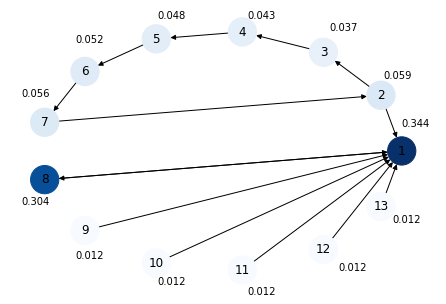

In [8]:
"""
The Original Graph: Add link Farm! No.2
     # 4 new nodes, all pointing to (NOT FROM) target
        
"""

# Declare this will be a directed graph
G = nx.DiGraph()

# Add 8 nodes
G.add_nodes_from(range(1,9))

# Add edges (same as the paper)
G.add_edges_from([(2,3),(3,4),(4,5),(5,6),(6,7),(7,2),(2,1),(1,8),(8,1)])

# Add edges to the target node
G.add_edges_from([(9,1),(10,1),(11,1),(12,1),(13,1)])

# Calculate the PageRank of each Node
pr = nx.pagerank(G, alpha=0.85)
print(pr)
print("Target has a pagerank of ", pr[1])

# Convert dictionary to a list
PR = [k for k in pr.values()]
PR

pos = nx.draw_shell(G, iterations=200,node_size=800, node_color=PR, with_labels=True,  cmap=plt.cm.Blues)

PR = [round(k,3) for k in pr.values()]
PR

# Sort these out later!!
plt.text(1,0.2,s = str(PR[0])) # Node 1
plt.text(0.9,0.6,s = str(PR[1])) # Node 2
plt.text(0.6,1,s = str(PR[2])) # Node 3
plt.text(0.15,1.1,s = str(PR[3])) # Node 4
plt.text(-0.35,1.1,s = str(PR[4])) # Node 5
plt.text(-0.8,0.9,s = str(PR[5])) # Node 6
plt.text(-1.1,0.45,s = str(PR[6])) # Node 8
plt.text(-1.1,-0.45,s = str(PR[7])) # Node 7

plt.text(-0.8,-0.9,s = str(PR[8])) # Node 9
plt.text(-0.35,-1.12,s = str(PR[9])) # Node 10
plt.text(0.15,-1.2,s = str(PR[10])) # Node 11
plt.text(0.65,-1,s = str(PR[11])) # Node 12
plt.text(0.95,-0.6,s = str(PR[12])) # Node 13
#plt.savefig("LinkFarmBLinksToTarget",dpi=500)

{1: 0.3914631474154294, 2: 0.03779313542402484, 3: 0.027600544093672096, 4: 0.03499892401808282, 5: 0.026413004246146767, 6: 0.022763988343073915, 7: 0.030887851630074403, 8: 0.06699655588619968, 9: 0.06699655588619968, 10: 0.07822208269081206, 11: 0.0818710985938849, 12: 0.06699655588619968, 13: 0.06699655588619968}
Target has a pagerank of  0.3914631474154294


Text(0.95, -0.6, '0.067')

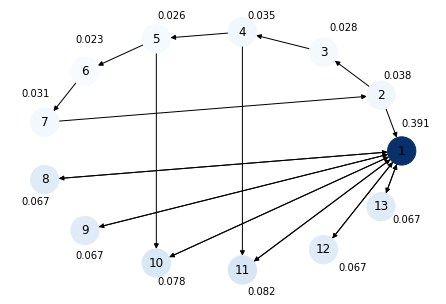

In [7]:
"""
The Original Graph: Add link Farm! No.1
 # 4 new nodes, all pointing to and from target
 # ALSO 2 Hijacked Links
        
"""

# Declare this will be a directed graph
G = nx.DiGraph()

# Add 8 nodes
G.add_nodes_from(range(1,13))

# Add edges (same as the paper)
G.add_edges_from([(2,3),(3,4),(4,5),(5,6),(6,7),(7,2),(2,1),(1,8),(8,1)])

# Add edges to the target node
G.add_edges_from([(9,1),(10,1),(11,1),(12,1),(13,1)])

# Add edges from the target node
G.add_edges_from([(1,9),(1,10),(1,11),(1,12),(1,13)])

# Add two hijacked nodes
G.add_edges_from([(4,11),(5,10)])

# Calculate the PageRank of each Node
pr = nx.pagerank(G, alpha=0.85)
print(pr)
print("Target has a pagerank of ", pr[1])

# Convert dictionary to a list
PR = [k for k in pr.values()]
PR

pos = nx.draw_shell(G, iterations=200,node_size=800, node_color=PR, with_labels=True,  cmap=plt.cm.Blues)

PR = [round(k,3) for k in pr.values()]
PR

# Sort these out later!!
plt.text(1,0.2,s = str(PR[0])) # Node 1
plt.text(0.9,0.6,s = str(PR[1])) # Node 2
plt.text(0.6,1,s = str(PR[2])) # Node 3
plt.text(0.15,1.1,s = str(PR[3])) # Node 4
plt.text(-0.35,1.1,s = str(PR[4])) # Node 5
plt.text(-0.8,0.9,s = str(PR[5])) # Node 6
plt.text(-1.1,0.45,s = str(PR[6])) # Node 8
plt.text(-1.1,-0.45,s = str(PR[7])) # Node 7

plt.text(-0.8,-0.9,s = str(PR[8])) # Node 9
plt.text(-0.35,-1.12,s = str(PR[9])) # Node 10
plt.text(0.15,-1.2,s = str(PR[10])) # Node 11
plt.text(0.65,-1,s = str(PR[11])) # Node 12
plt.text(0.95,-0.6,s = str(PR[12])) # Node 13
#plt.savefig("LinkFarmCHijackedLinks",dpi=500)